## 데이터명 : 지역별 신설법인 데이터

### 2018년 ~ 2020년 3개년 지역별 신설된 법인 데이터 

In [3]:
# 환경구축

import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.5f}'.format
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt

In [7]:
#원본데이터

data = pd.read_excel("1.지역별 신설법인 데이터.xlsx")
data.head(2)

,KEDCD,기업명,기업형태,업종코드_10차,업종코드_10차명,설립일자,성별,우편번호,시도,구군,법정동,위도,경도,자본금,연령대
0,2184375.00000,*우,주식회사,NaN,NaN,20180528,NaN,38211.00000,경북,경주시,외동읍,35.74113,129.32344,20000000.00000,20대
1,2391722.00000,***면화학,주식회사,C20499,그 외 기타 분류 안된 화학제품 제조업,20180123,남성,15619.00000,NaN,NaN,NaN,NaN,NaN,1046000000.00000,40대


* 데이터 확인

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351604 entries, 0 to 351603
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   KEDCD      350275 non-null  float64
 1   기업명        351604 non-null  object 
 2   기업형태       351521 non-null  object 
 3   업종코드_10차   351566 non-null  object 
 4   업종코드_10차명  351566 non-null  object 
 5   설립일자       351604 non-null  int64  
 6   성별         274865 non-null  object 
 7   우편번호       349828 non-null  float64
 8   시도         349037 non-null  object 
 9   구군         346800 non-null  object 
 10  법정동        349035 non-null  object 
 11  위도         348409 non-null  float64
 12  경도         348409 non-null  float64
 13  자본금        350775 non-null  float64
 14  연령대        351604 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 40.2+ MB


In [8]:
data.isnull().sum()

KEDCD         1329
기업명              0
기업형태            83
업종코드_10차        38
업종코드_10차명       38
설립일자             0
성별           76739
우편번호          1776
시도            2567
구군            4804
법정동           2569
위도            3195
경도            3195
자본금            829
연령대              0
dtype: int64

* 전처리 : 데이터 타입 변환

In [9]:
data['설립일자'] = data['설립일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y/%m/%d'))

## 지역별 청년인구 대비 신설법인 수(창업수)

* 지역별 20,30대 신설법인 수

In [10]:
youth_data= data[(data['연령대']=='20대') | (data['연령대']=='30대')]
youth_data

,KEDCD,기업명,기업형태,업종코드_10차,업종코드_10차명,설립일자,성별,우편번호,시도,구군,법정동,위도,경도,자본금,연령대
0,2184375.00000,*우,주식회사,NaN,NaN,2018-05-28,NaN,38211.00000,경북,경주시,외동읍,35.74113,129.32344,20000000.00000,20대
2,2407385.00000,**나눔,조합,P85709,기타 교육지원 서비스업,2018-01-31,남성,31101.00000,충남,천안시 서북구,두정동,36.83696,127.13875,NaN,20대
10,2463207.00000,***로벌,주식회사,C22259,기타 플라스틱 발포 성형제품 제조업,2018-07-11,남성,59315.00000,전남,장흥군,장흥읍,34.69501,126.93805,180000000.00000,30대
15,2475316.00000,***어스,주식회사,J59113,광고 영화 및 비디오물 제작업,2018-07-24,여성,27469.00000,충북,충주시,대소원면,36.96982,127.87157,26000000.00000,30대
16,2487577.00000,**록,주식회사,J58222,응용 소프트웨어 개발 및 공급업,2018-08-31,남성,14056.00000,경기,안양시 동안구,관양동,37.39922,126.96809,50000000.00000,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351582,NaN,**환경,주식회사,M72919,"기타 기술 시험, 검사 및 분석업",2020-01-31,남성,16305.00000,경기,수원시 장안구,송죽동,37.30087,127.00770,30000000.00000,30대
351596,NaN,*****협동조합,조합,C13229,기타 직물제품 제조업,2020-05-07,여성,61087.00000,광주,북구,신용동,35.20667,126.86271,0.00000,30대
351599,NaN,*영,주식회사,C27309,기타 광학기기 제조업,2020-09-15,NaN,22826.00000,인천,서구,가좌동,37.48451,126.68142,30000000.00000,30대
351600,NaN,***쇼핑,주식회사,I56111,한식 일반 음식점업,2020-01-16,NaN,47710.00000,부산,동래구,온천동,35.21888,129.08415,100000000.00000,20대


In [11]:
youth_data.isnull().sum()

KEDCD          352
기업명              0
기업형태             8
업종코드_10차         6
업종코드_10차명        6
설립일자             0
성별           32419
우편번호           424
시도             604
구군            1201
법정동            604
위도             766
경도             766
자본금            246
연령대              0
dtype: int64

In [12]:
#사용속성 (시도, 연령대)가 null값인 경우 데이터 삭제 

youth_data= youth_data.dropna(subset=['시도','연령대'],axis=0)
youth_data

,KEDCD,기업명,기업형태,업종코드_10차,업종코드_10차명,설립일자,성별,우편번호,시도,구군,법정동,위도,경도,자본금,연령대
0,2184375.00000,*우,주식회사,NaN,NaN,2018-05-28,NaN,38211.00000,경북,경주시,외동읍,35.74113,129.32344,20000000.00000,20대
2,2407385.00000,**나눔,조합,P85709,기타 교육지원 서비스업,2018-01-31,남성,31101.00000,충남,천안시 서북구,두정동,36.83696,127.13875,NaN,20대
10,2463207.00000,***로벌,주식회사,C22259,기타 플라스틱 발포 성형제품 제조업,2018-07-11,남성,59315.00000,전남,장흥군,장흥읍,34.69501,126.93805,180000000.00000,30대
15,2475316.00000,***어스,주식회사,J59113,광고 영화 및 비디오물 제작업,2018-07-24,여성,27469.00000,충북,충주시,대소원면,36.96982,127.87157,26000000.00000,30대
16,2487577.00000,**록,주식회사,J58222,응용 소프트웨어 개발 및 공급업,2018-08-31,남성,14056.00000,경기,안양시 동안구,관양동,37.39922,126.96809,50000000.00000,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351582,NaN,**환경,주식회사,M72919,"기타 기술 시험, 검사 및 분석업",2020-01-31,남성,16305.00000,경기,수원시 장안구,송죽동,37.30087,127.00770,30000000.00000,30대
351596,NaN,*****협동조합,조합,C13229,기타 직물제품 제조업,2020-05-07,여성,61087.00000,광주,북구,신용동,35.20667,126.86271,0.00000,30대
351599,NaN,*영,주식회사,C27309,기타 광학기기 제조업,2020-09-15,NaN,22826.00000,인천,서구,가좌동,37.48451,126.68142,30000000.00000,30대
351600,NaN,***쇼핑,주식회사,I56111,한식 일반 음식점업,2020-01-16,NaN,47710.00000,부산,동래구,온천동,35.21888,129.08415,100000000.00000,20대


In [13]:
#결측값 또는 이상치 없는 전국 시도 17개 확인

print(np.unique(youth_data['시도']))
print(len(np.unique(youth_data['시도'])))

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
17


In [14]:
youth_data.head(2)

,KEDCD,기업명,기업형태,업종코드_10차,업종코드_10차명,설립일자,성별,우편번호,시도,구군,법정동,위도,경도,자본금,연령대
0,2184375.00000,*우,주식회사,NaN,NaN,2018-05-28,NaN,38211.00000,경북,경주시,외동읍,35.74113,129.32344,20000000.00000,20대
2,2407385.00000,**나눔,조합,P85709,기타 교육지원 서비스업,2018-01-31,남성,31101.00000,충남,천안시 서북구,두정동,36.83696,127.13875,NaN,20대


In [15]:
# 설립일자별(2018, 2019, 2020) 데이터 나누기

youth_data_2018 = youth_data[youth_data['설립일자'].between('2018-01-01','2018-12-31')]
youth_data_2019 = youth_data[youth_data['설립일자'].between('2019-01-01','2019-12-31')]
youth_data_2020 = youth_data[youth_data['설립일자'].between('2020-01-01','2020-12-31')]

In [16]:
# 설립일자 월단위 -> 연단위 변경
youth_data_2018['설립일자']= '2018'
youth_data_2019['설립일자']= '2019'
youth_data_2020['설립일자']= '2020'

<ipython-input-16-200bf5de5863>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youth_data_2018['설립일자']= '2018'
<ipython-input-16-200bf5de5863>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youth_data_2019['설립일자']= '2019'
<ipython-input-16-200bf5de5863>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [17]:
youth_data_total = pd.concat([youth_data_2018,youth_data_2019,youth_data_2020])

In [18]:
# 연도별 신설법인 개수 Series

youth_data_2018_df = pd.DataFrame(youth_data_2018.groupby(['시도']).size(),columns=['신설법인수'])
youth_data_2019_df = pd.DataFrame(youth_data_2019.groupby(['시도']).size(),columns=['신설법인수'])
youth_data_2020_df = pd.DataFrame(youth_data_2020.groupby(['시도']).size(),columns=['신설법인수'])

[신설법인수    30875
dtype: int64, 신설법인수    33089
dtype: int64, 신설법인수    36774
dtype: int64]


<AxesSubplot:>

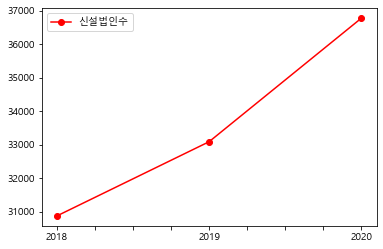

In [71]:
#연도별 신설법인 개수 확인

num_bubin = [youth_data_2018_df.sum(),youth_data_2019_df.sum(),youth_data_2020_df.sum()]
print(num_bubin)
df = pd.DataFrame(num_bubin, index=['2018','2019','2020'])
df.plot(marker='o',color='r')

In [48]:
#연도별 / 지역별 신설법인 수

youth_group = youth_data_total.groupby(['설립일자','시도'])
youth_group.size()

설립일자  시도
2018  강원      541
      경기     7153
      경남      959
      경북      988
      광주     1146
      대구      909
      대전      772
      부산     1445
      서울    11463
      세종      176
      울산      339
      인천     1373
      전남      931
      전북      754
      제주      382
      충남      889
      충북      655
2019  강원      507
      경기     8498
      경남     1003
      경북      955
      광주     1114
      대구      975
      대전      750
      부산     1554
      서울    11970
      세종      204
      울산      328
      인천     1543
      전남      862
      전북      882
      제주      380
      충남      948
      충북      616
2020  강원      650
      경기    10260
      경남     1104
      경북     1008
      광주     1141
      대구     1030
      대전      892
      부산     1781
      서울    12277
      세종      217
      울산      387
      인천     1765
      전남      887
      전북     1028
      제주      386
      충남     1203
      충북      758
dtype: int64

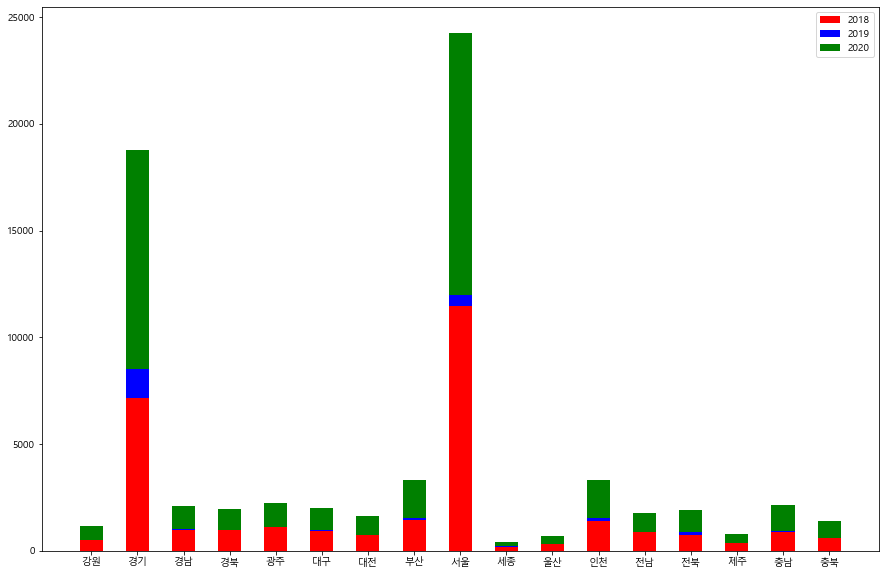

In [95]:
#연도별 증가추세 적층 그래프로 표현

plt.figure(figsize=(15,10))

index = np.unique(youth_data_total['시도'])

data1 = youth_group.size().loc['2018']
data2 = youth_group.size().loc['2019']
data3 = youth_group.size().loc['2020']

plt.bar(index,data1,color='r',width=0.5)
plt.bar(index,data2,color='b',width=0.5,bottom=data1)
plt.bar(index,data3,color='g',width=0.5,bottom=data2)
plt.legend(['2018','2019','2020'])

In [188]:
#3개년 총합 순위

youth_data_2018_df = pd.DataFrame(youth_data_2018.groupby(['시도']).size(),columns=['신설법인수'])
youth_data_2019_df = pd.DataFrame(youth_data_2019.groupby(['시도']).size(),columns=['신설법인수'])
youth_data_2020_df = pd.DataFrame(youth_data_2020.groupby(['시도']).size(),columns=['신설법인수'])

youth_data_total_df = pd.concat([youth_data_2018_df,youth_data_2019_df,youth_data_2020_df],axis=1)
youth_data_total_df.columns=['2018','2019','2020']
youth_data_total_df['Total']= (youth_data_total_df['2018']+youth_data_total_df['2019']+youth_data_total_df['2020'])/3
youth_data_total_df

,2018,2019,2020,Total
시도,,,,
강원,541,507,650,566.00000
경기,7153,8498,10260,8637.00000
경남,959,1003,1104,1022.00000
경북,988,955,1008,983.66667
광주,1146,1114,1141,1133.66667
대구,909,975,1030,971.33333
대전,772,750,892,804.66667
부산,1445,1554,1781,1593.33333
서울,11463,11970,12277,11903.33333


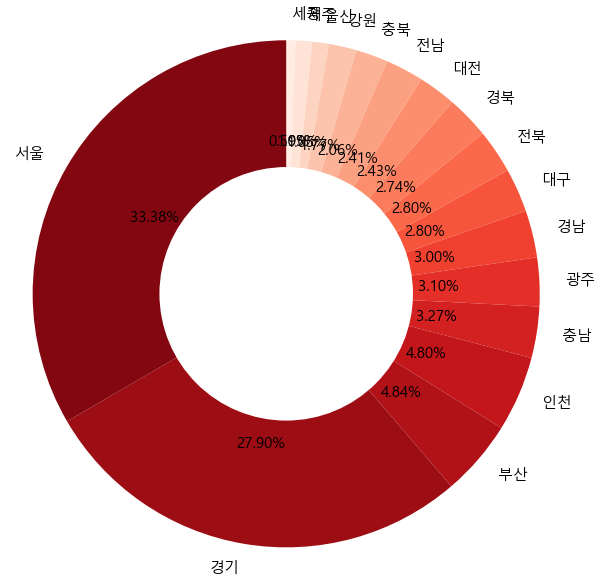

In [115]:
import seaborn as sns

youth_data_total_df['2020']

colors = sns.color_palette("Reds",len(youth_population.index)) ## 라벨의 개수 만큼 색상 리스트 생성 
 
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
#fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(youth_data_total_df['2020'].sort_values(), ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       colors = colors,
       textprops={'size': 15},
       labels = youth_data_total_df['2020'].sort_values().index)

centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
# plt.legend(pie[0],youth_population['Total'].sort_values().index) ## 범례 표시
plt.show()

In [135]:
sns_data = youth_data_total_df.reset_index()
sns_data

,시도,2018,2019,2020,Total
0,강원,541,507,650,566.00000
1,경기,7153,8498,10260,8637.00000
2,경남,959,1003,1104,1022.00000
3,경북,988,955,1008,983.66667
4,광주,1146,1114,1141,1133.66667
5,대구,909,975,1030,971.33333
6,대전,772,750,892,804.66667
7,부산,1445,1554,1781,1593.33333
8,서울,11463,11970,12277,11903.33333
9,세종,176,204,217,199.00000


In [136]:
sido_list = sns_data['시도'].values

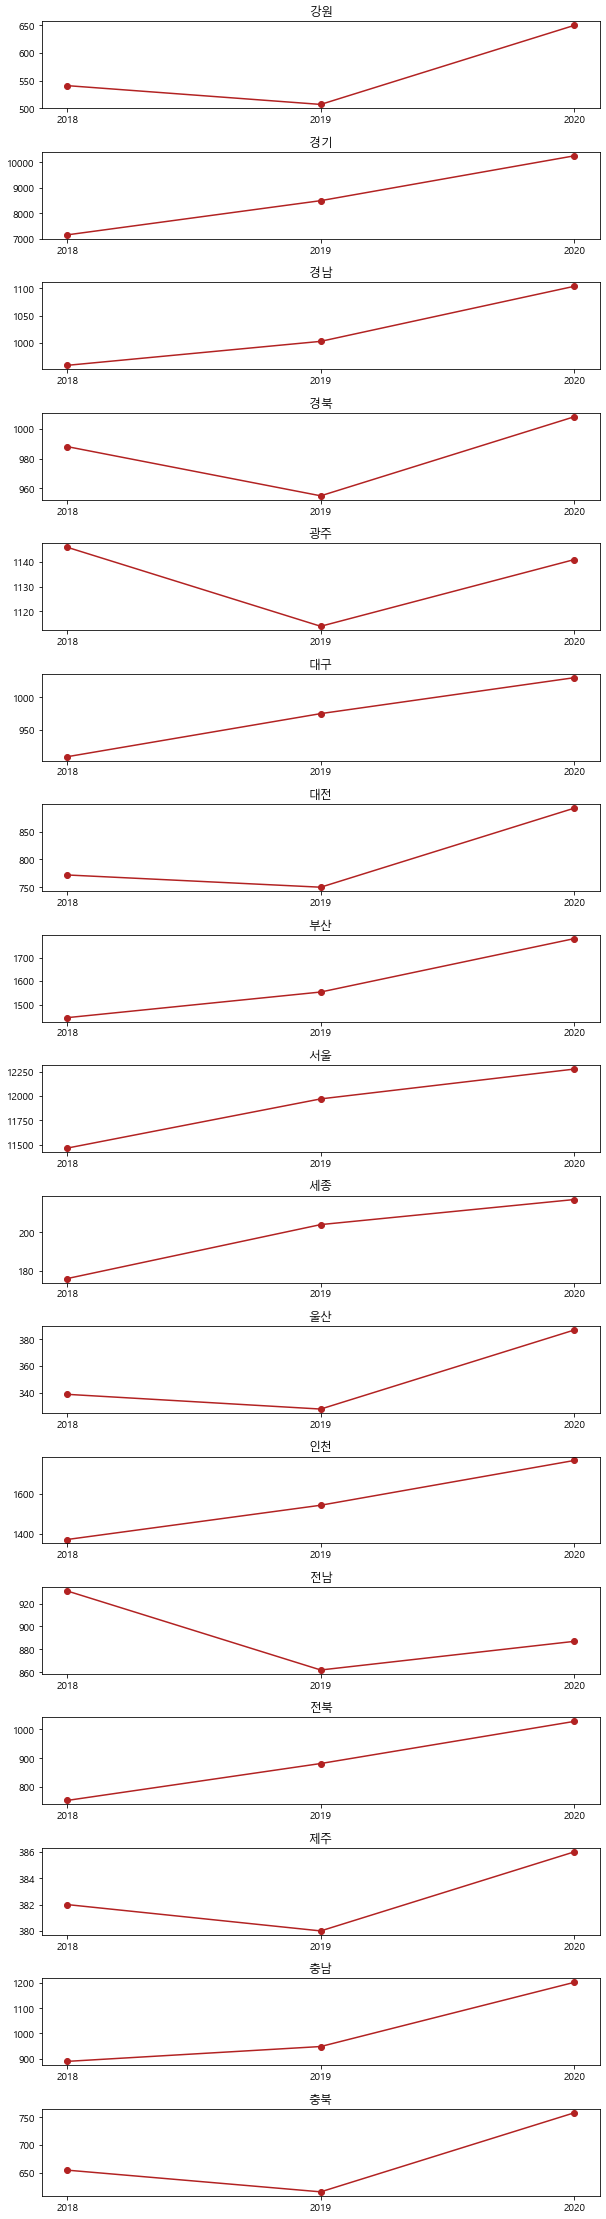

In [137]:
fig,ax=plt.subplots(17,1,figsize=(10,40))
plt.subplots_adjust(hspace=0.50)

for i,sido in enumerate(sido_list) : 
    ax[i].plot(youth_data_total_df.loc[f'{sido}'][:-1],color='firebrick', marker='o',)
    ax[i].set_title(f'{sido}')
    

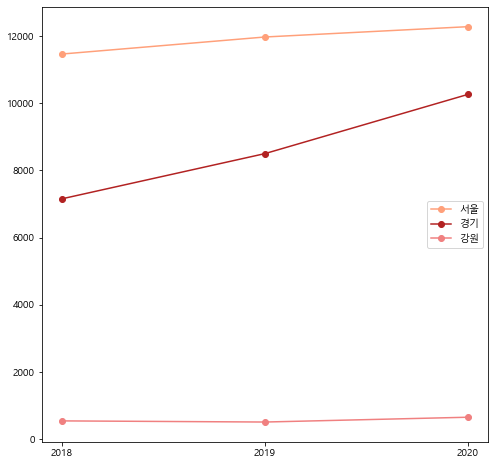

In [141]:
plt.figure(figsize=(8,8))

plt.plot(youth_data_total_df.loc['서울'][:-1],color='lightsalmon', marker='o',)
plt.plot(youth_data_total_df.loc['경기'][:-1],color='firebrick', marker='o',)
plt.plot(youth_data_total_df.loc['강원'][:-1],color='lightcoral', marker='o',)
plt.legend(['서울','경기','강원'])

In [147]:
#시도별 증가율

uprate_sido = {}

for sido in sido_list : 
    print(sido)
    print('2020:',youth_data_total_df.loc[f'{sido}'][:-1][2])
    print('2019:',youth_data_total_df.loc[f'{sido}'][:-1][1])
    a = ((youth_data_total_df.loc[f'{sido}'][:-1][2]-youth_data_total_df.loc[f'{sido}'][:-1][1])/youth_data_total_df.loc[f'{sido}'][:-1][1])*100
    uprate_sido[f'{sido}'] = a
    
uprate_sido
    

강원
2020: 650.0
2019: 507.0
경기
2020: 10260.0
2019: 8498.0
경남
2020: 1104.0
2019: 1003.0
경북
2020: 1008.0
2019: 955.0
광주
2020: 1141.0
2019: 1114.0
대구
2020: 1030.0
2019: 975.0
대전
2020: 892.0
2019: 750.0
부산
2020: 1781.0
2019: 1554.0
서울
2020: 12277.0
2019: 11970.0
세종
2020: 217.0
2019: 204.0
울산
2020: 387.0
2019: 328.0
인천
2020: 1765.0
2019: 1543.0
전남
2020: 887.0
2019: 862.0
전북
2020: 1028.0
2019: 882.0
제주
2020: 386.0
2019: 380.0
충남
2020: 1203.0
2019: 948.0
충북
2020: 758.0
2019: 616.0


{'강원': 28.205128205128204,
 '경기': 20.734290421275595,
 '경남': 10.069790628115653,
 '경북': 5.549738219895288,
 '광주': 2.423698384201077,
 '대구': 5.641025641025641,
 '대전': 18.933333333333334,
 '부산': 14.607464607464607,
 '서울': 2.5647451963241434,
 '세종': 6.372549019607843,
 '울산': 17.98780487804878,
 '인천': 14.387556707712248,
 '전남': 2.9002320185614847,
 '전북': 16.55328798185941,
 '제주': 1.5789473684210527,
 '충남': 26.89873417721519,
 '충북': 23.051948051948052}

#### 시도_청년_총인구 : 행정구역(시군구)별/1세별 주민등록인구 // 출처- https://kosis.kr/index/index.do [국가통계포털]

In [79]:
youth_population = pd.read_csv('시도_청년_총인구.csv')

In [80]:
# 월 단위 column 삭제

youth_population= youth_population.drop(['2018. 01 월', '2018. 02 월',
       '2018. 03 월', '2018. 04 월', '2018. 05 월', '2018. 06 월', '2018. 07 월',
       '2018. 08 월', '2018. 09 월', '2018. 10 월', '2018. 11 월', '2018. 12 월',
       '2019. 01 월', '2019. 02 월', '2019. 03 월', '2019. 04 월', '2019. 05 월',
       '2019. 06 월', '2019. 07 월', '2019. 08 월', '2019. 09 월', '2019. 10 월',
       '2019. 11 월', '2019. 12 월', '2020. 01 월', '2020. 02 월', '2020. 03 월',
       '2020. 04 월', '2020. 05 월', '2020. 06 월', '2020. 07 월', '2020. 08 월',
       '2020. 09 월', '2020. 10 월', '2020. 11 월', '2020. 12 월'],axis=1)

In [81]:
youth_population = youth_population.sort_values('행정구역(시군구)별')
youth_population = youth_population[['행정구역(시군구)별','연령별','2018 년','2019 년','2020 년']]
youth_population

,행정구역(시군구)별,연령별,2018 년,2019 년,2020 년
9,강원도,20세~39세,358469,351771,346364
8,경기도,20세~39세,3698625,3696522,3715307
15,경상남도,20세~39세,835415,810243,777994
14,경상북도,20세~39세,619667,601357,575280
4,광주광역시,20세~39세,406163,400391,395242
2,대구광역시,20세~39세,648823,629627,615844
5,대전광역시,20세~39세,422995,413109,406576
1,부산광역시,20세~39세,899448,871859,850001
0,서울특별시,20세~39세,2998560,2966582,2935517
7,세종특별자치시,20세~39세,92412,97804,98945


In [82]:
#연도별 및 3개년 평균 청년 인구데이터 완성

youth_population['Total'] = round((youth_population['2018 년']+youth_population['2019 년']+youth_population['2020 년'])/3)
youth_population

,행정구역(시군구)별,연령별,2018 년,2019 년,2020 년,Total
9,강원도,20세~39세,358469,351771,346364,352201.00000
8,경기도,20세~39세,3698625,3696522,3715307,3703485.00000
15,경상남도,20세~39세,835415,810243,777994,807884.00000
14,경상북도,20세~39세,619667,601357,575280,598768.00000
4,광주광역시,20세~39세,406163,400391,395242,400599.00000
2,대구광역시,20세~39세,648823,629627,615844,631431.00000
5,대전광역시,20세~39세,422995,413109,406576,414227.00000
1,부산광역시,20세~39세,899448,871859,850001,873769.00000
0,서울특별시,20세~39세,2998560,2966582,2935517,2966886.00000
7,세종특별자치시,20세~39세,92412,97804,98945,96387.00000


In [83]:
youth_population.replace({'강원도':'강원',
                '경기도':'경기',
                '경상남도':'경남',
                '경상북도':'경북',
                '광주광역시':'광주',
                '대구광역시':'대구',
                '대전광역시' :'대전',
                '부산광역시' :'부산',
                '서울특별시':'서울',
                '세종특별자치시':'세종',
                '울산광역시':'울산',
                '인천광역시':'인천',
                '전라남도':'전남',
                '전라북도':'전북',
                '제주특별자치도':'제주',
                '충청남도':'충남',
                '충청북도':'충북'},inplace=True)
youth_population.set_index('행정구역(시군구)별',inplace=True)

In [84]:
youth_population

,연령별,2018 년,2019 년,2020 년,Total
행정구역(시군구)별,,,,,
강원,20세~39세,358469,351771,346364,352201.00000
경기,20세~39세,3698625,3696522,3715307,3703485.00000
경남,20세~39세,835415,810243,777994,807884.00000
경북,20세~39세,619667,601357,575280,598768.00000
광주,20세~39세,406163,400391,395242,400599.00000
대구,20세~39세,648823,629627,615844,631431.00000
대전,20세~39세,422995,413109,406576,414227.00000
부산,20세~39세,899448,871859,850001,873769.00000
서울,20세~39세,2998560,2966582,2935517,2966886.00000


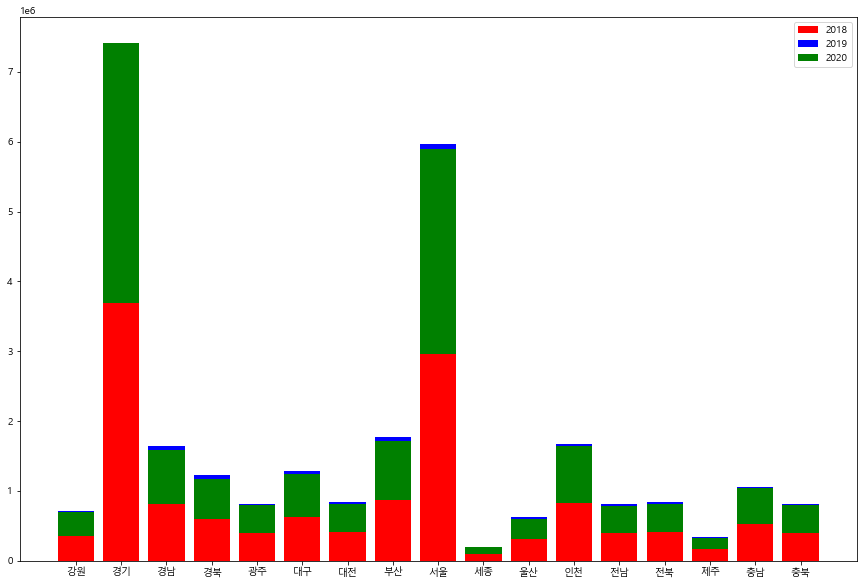

In [103]:
youth_population[['2018 년','2019 년','2020 년']]

index = youth_population.index

plt.figure(figsize=(15,10))
plt.bar(index,youth_population['2018 년'],color='r')
plt.bar(index,youth_population['2019 년'],color='b',bottom=youth_population['2018 년'])
plt.bar(index,youth_population['2020 년'],color='g',bottom=youth_population['2019 년'])

plt.legend(['2018','2019','2020'])

In [164]:
youth_pop_2018 = youth_population[['2018 년']]
youth_pop_2018.columns=['청년인구수']
youth_pop_2018['설립일자'] = '2018'
youth_pop_2018= youth_pop_2018.reset_index()
youth_pop_2018.columns=['시도','청년인구수','설립일자']
youth_pop_2018

<ipython-input-164-3b9850a8f897>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youth_pop_2018['설립일자'] = '2018'


,시도,청년인구수,설립일자
0,강원,358469,2018
1,경기,3698625,2018
2,경남,835415,2018
3,경북,619667,2018
4,광주,406163,2018
5,대구,648823,2018
6,대전,422995,2018
7,부산,899448,2018
8,서울,2998560,2018
9,세종,92412,2018


In [165]:
youth_pop_2019 = youth_population[['2019 년']]
youth_pop_2019.columns=['청년인구수']
youth_pop_2019['설립일자'] = '2019'
youth_pop_2019= youth_pop_2019.reset_index()
youth_pop_2019.columns=['시도','청년인구수','설립일자']
youth_pop_2019

<ipython-input-165-2a429ca8a9d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youth_pop_2019['설립일자'] = '2019'


,시도,청년인구수,설립일자
0,강원,351771,2019
1,경기,3696522,2019
2,경남,810243,2019
3,경북,601357,2019
4,광주,400391,2019
5,대구,629627,2019
6,대전,413109,2019
7,부산,871859,2019
8,서울,2966582,2019
9,세종,97804,2019


In [166]:
youth_pop_2020 = youth_population[['2020 년']]
youth_pop_2020.columns=['청년인구수']
youth_pop_2020['설립일자'] = '2020'
youth_pop_2020= youth_pop_2020.reset_index()
youth_pop_2020.columns=['시도','청년인구수','설립일자']
youth_pop_2020

<ipython-input-166-cc9ee8b00278>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youth_pop_2020['설립일자'] = '2020'


,시도,청년인구수,설립일자
0,강원,346364,2020
1,경기,3715307,2020
2,경남,777994,2020
3,경북,575280,2020
4,광주,395242,2020
5,대구,615844,2020
6,대전,406576,2020
7,부산,850001,2020
8,서울,2935517,2020
9,세종,98945,2020


<AxesSubplot:>

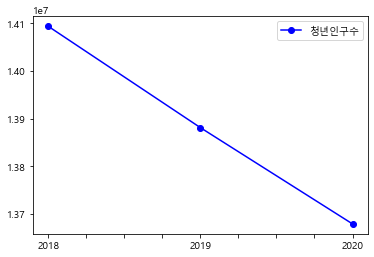

In [167]:
num_youth= [youth_pop_2018['청년인구수'].sum(),youth_pop_2019['청년인구수'].sum(),youth_pop_2020['청년인구수'].sum()]
df = pd.DataFrame(num_youth, index=['2018','2019','2020'])
df.columns=['청년인구수']
df.plot(marker='o',color='b')

In [168]:
youth_pop_total = pd.concat([youth_pop_2018,youth_pop_2019,youth_pop_2020])

In [169]:
youth_pop_total.pivot_table('청년인구수',index=['설립일자','시도'])

청년인구수
설립일자 시도         
2018 강원   358469
     경기  3698625
     경남   835415
     경북   619667
     광주   406163
     대구   648823
     대전   422995
     부산   899448
     서울  2998560
     세종    92412
     울산   319567
     인천   843463
     전남   411745
     전북   425428
     제주   169441
     충남   537386
     충북   406509
2019 강원   351771
     경기  3696522
     경남   810243
     경북   601357
     광주   400391
     대구   629627
     대전   413109
     부산   871859
     서울  2966582
     세종    97804
     울산   308880
     인천   828797
     전남   400334
     전북   411844
     제주   166985
     충남   524990
     충북   400285
2020 강원   346364
     경기  3715307
     경남   777994
     경북   575280
     광주   395242
     대구   615844
     대전   406576
     부산   850001
     서울  2935517
     세종    98945
     울산   296274
     인천   807692
     전남   386773
     전북   400476
     제주   165301
     충남   511798
     충북   393886

In [170]:
pd.concat([youth_group.size(),youth_pop_total.pivot_table('청년인구수',index=['설립일자','시도'])],axis=1).to_csv('신설법인3개년.csv',encoding='utf-8-sig')

In [171]:
pd.concat([youth_group.size(),youth_pop_total.pivot_table('청년인구수',index=['설립일자','시도'])],axis=1)

0    청년인구수
설립일자 시도                
2018 강원    541   358469
     경기   7153  3698625
     경남    959   835415
     경북    988   619667
     광주   1146   406163
     대구    909   648823
     대전    772   422995
     부산   1445   899448
     서울  11463  2998560
     세종    176    92412
     울산    339   319567
     인천   1373   843463
     전남    931   411745
     전북    754   425428
     제주    382   169441
     충남    889   537386
     충북    655   406509
2019 강원    507   351771
     경기   8498  3696522
     경남   1003   810243
     경북    955   601357
     광주   1114   400391
     대구    975   629627
     대전    750   413109
     부산   1554   871859
     서울  11970  2966582
     세종    204    97804
     울산    328   308880
     인천   1543   828797
     전남    862   400334
     전북    882   411844
     제주    380   166985
     충남    948   524990
     충북    616   400285
2020 강원    650   346364
     경기  10260  3715307
     경남   1104   777994
     경북   1008   575280
     광주   1141   395242
     대구   1030   615844
     대전    892   406576
     부산   1781   850001
     서울  12277  2935517
     세종    217    98945
     울산    387   296274
     인천   1765   807692
     전남    887   386773
     전북   1028   400476
     제주    386   165301
     충남   1203   511798
     충북    758   393886

In [172]:
#태블로 사용 파일

new_bis = pd.concat([youth_group.size(),youth_pop_total.pivot_table('청년인구수',index=['설립일자','시도'])],axis=1)
new_bis.columns=['신설법인수','청년인구수']
new_bis['인구대비신설법인수'] = (new_bis['신설법인수']/new_bis['청년인구수'])
new_bis.to_csv('지역별신설법인데이터_3개년.csv',encoding='utf-8-sig')

In [180]:
new_bis.head(2)

신설법인수    청년인구수  인구대비신설법인수
설립일자 시도                           
2018 강원    541   358469    0.00151
     경기   7153  3698625    0.00193

In [181]:
youth_population['2020 년'].sum()

13679270

* 지역별 청년인구 pie 차트

<AxesSubplot:ylabel='youth'>

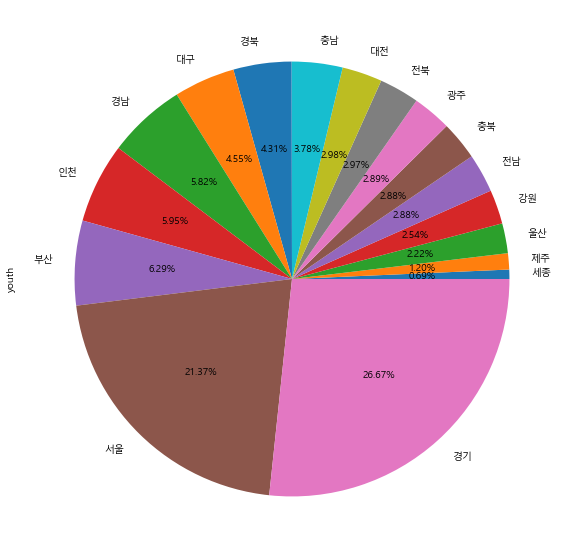

In [182]:
# 청년인구 지역별 비교

youth_population['Total'].sort_values().plot(kind='pie',figsize=(10,10),autopct=lambda p : '{:.2f}%'.format(p),ylabel='youth')

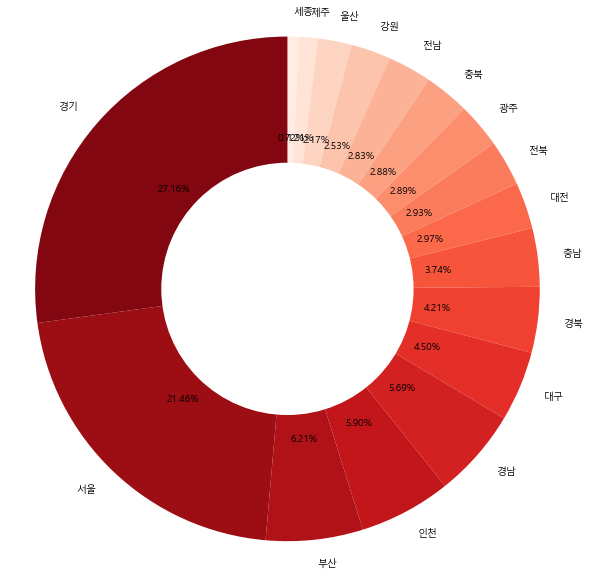

In [183]:
import seaborn as sns

colors = sns.color_palette("Reds",len(youth_population.index)) ## 라벨의 개수 만큼 색상 리스트 생성 
 
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
#fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(youth_population['2020 년'].sort_values(), ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       colors = colors,
       labels = youth_population['2020 년'].sort_values().index)

centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
# plt.legend(pie[0],youth_population['Total'].sort_values().index) ## 범례 표시
plt.show()

# 연도별 인구대비 신설법인 수 (2018,2019,2020)

In [185]:
#2018년

youth_data_2018_df['청년인구'] = youth_population['2018 년']
youth_data_2018_df
youth_data_2018_df['인구대비신설법인수'] = youth_data_2018_df['신설법인수']/ youth_data_2018_df['청년인구']
youth_data_2018_df.sort_values('인구대비신설법인수',ascending=False,inplace=True)
youth_data_2018_df

,신설법인수,청년인구,인구대비신설법인수
시도,,,
서울,11463,2998560,0.00382
광주,1146,406163,0.00282
전남,931,411745,0.00226
제주,382,169441,0.00225
경기,7153,3698625,0.00193
세종,176,92412,0.00190
대전,772,422995,0.00183
전북,754,425428,0.00177
충남,889,537386,0.00165


In [186]:
#2019

youth_data_2019_df['청년인구'] = youth_population['2018 년']
youth_data_2019_df
youth_data_2019_df['인구대비신설법인수'] = youth_data_2019_df['신설법인수']/ youth_data_2019_df['청년인구']
youth_data_2019_df.sort_values('인구대비신설법인수',ascending=False,inplace=True)
youth_data_2019_df

,신설법인수,청년인구,인구대비신설법인수
시도,,,
서울,11970,2998560,0.00399
광주,1114,406163,0.00274
경기,8498,3698625,0.00230
제주,380,169441,0.00224
세종,204,92412,0.00221
전남,862,411745,0.00209
전북,882,425428,0.00207
인천,1543,843463,0.00183
대전,750,422995,0.00177


In [187]:
#2020

youth_data_2020_df['청년인구'] = youth_population['2020 년']
youth_data_2020_df
youth_data_2020_df['인구대비신설법인수'] = youth_data_2020_df['신설법인수']/ youth_data_2020_df['청년인구']
youth_data_2020_df.sort_values('인구대비신설법인수',ascending=False,inplace=True)
youth_data_2020_df

,신설법인수,청년인구,인구대비신설법인수
시도,,,
서울,12277,2935517,0.00418
광주,1141,395242,0.00289
경기,10260,3715307,0.00276
전북,1028,400476,0.00257
충남,1203,511798,0.00235
제주,386,165301,0.00234
전남,887,386773,0.00229
대전,892,406576,0.00219
세종,217,98945,0.00219


In [116]:
#신설법인 3년 평균 /인구 3년 평균  = 3년 평균 인구대비 신설법인수

print(youth_data_total_df['Total'].index)
print(youth_population['Total'].index)

youth_total_df = pd.concat([youth_data_total_df['Total'],youth_population['Total']],axis=1)
youth_total_df.columns=['신설법인수','청년인구']
youth_total_df['인구대비신설법인수'] = youth_total_df['신설법인수']/ youth_total_df['청년인구']
youth_total_df.sort_values('인구대비신설법인수',ascending=False,inplace=True)
youth_total_df

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='시도')
Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='행정구역(시군구)별')


,신설법인수,청년인구,인구대비신설법인수
서울,11903.33333,2966886.00000,0.00401
광주,1133.66667,400599.00000,0.00283
경기,8637.00000,3703485.00000,0.00233
제주,382.66667,167242.00000,0.00229
전남,893.33333,399617.00000,0.00224
전북,888.00000,412583.00000,0.00215
세종,199.00000,96387.00000,0.00206
대전,804.66667,414227.00000,0.00194
충남,1013.33333,524725.00000,0.00193
인천,1560.33333,826651.00000,0.00189


# 신설법인 창업자 연령대 비중

In [30]:
data.head()

,KEDCD,기업명,기업형태,업종코드_10차,업종코드_10차명,설립일자,성별,우편번호,시도,구군,법정동,위도,경도,자본금,연령대
0,2184375.00000,*우,주식회사,NaN,NaN,2018-05-28,NaN,38211.00000,경북,경주시,외동읍,35.74113,129.32344,20000000.00000,20대
1,2391722.00000,***면화학,주식회사,C20499,그 외 기타 분류 안된 화학제품 제조업,2018-01-23,남성,15619.00000,NaN,NaN,NaN,NaN,NaN,1046000000.00000,40대
2,2407385.00000,**나눔,조합,P85709,기타 교육지원 서비스업,2018-01-31,남성,31101.00000,충남,천안시 서북구,두정동,36.83696,127.13875,NaN,20대
3,2416041.00000,***설산업,주식회사,C25112,구조용 금속 판제품 및 공작물 제조업,2018-02-26,남성,17170.00000,경기,용인시 처인구,원삼면,37.13523,127.30793,100000000.00000,40대
4,2416939.00000,**** 스마트,기타법인,M71102,변리사업,2018-03-20,남성,35240.00000,대전,서구,둔산동,36.35325,127.38708,NaN,40대


In [31]:
data.isnull().sum()

KEDCD         1329
기업명              0
기업형태            83
업종코드_10차        38
업종코드_10차명       38
설립일자             0
성별           76739
우편번호          1776
시도            2567
구군            4804
법정동           2569
위도            3195
경도            3195
자본금            829
연령대              0
dtype: int64

In [32]:
np.unique(data['연령대'])

array(['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '90대이상', '정보없음'], dtype=object)

In [33]:
age_data = data.dropna(subset=['시도'])

In [34]:
np.unique(age_data['시도'])

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [35]:
np.unique(age_data['연령대'])

array(['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '90대이상', '정보없음'], dtype=object)

In [36]:
age_dict = {'90대이상':np.NaN, '정보없음':np.NaN}
age_data.replace(age_dict,inplace=True)
age_data = age_data.dropna(subset=['연령대'])
np.unique(age_data['연령대'])

C:\Users\user\.conda\envs\da\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array(['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대'],
      dtype=object)

In [37]:
age_group = age_data.groupby('연령대')
age_group.size()

연령대
10대        95
20대     25315
30대     75423
40대    117443
50대     89660
60대     33324
70대      5734
80대       657
90대       184
dtype: int64

In [38]:
type(age_group.size())

pandas.core.series.Series

<AxesSubplot:ylabel='age'>

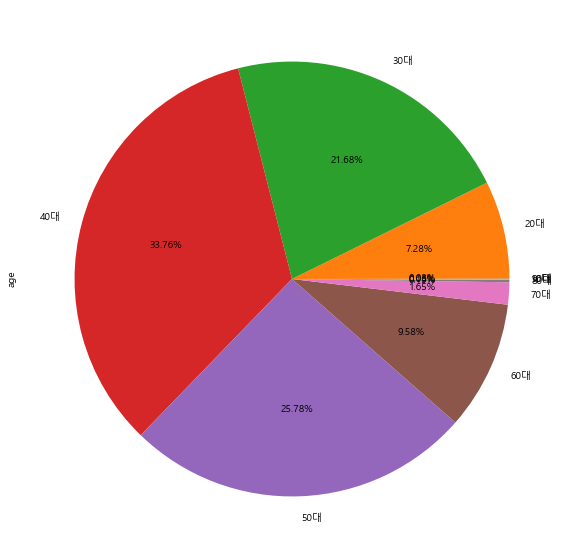

In [39]:
#전국 창업자 연령대 비중

age_group.size().plot(kind='pie',figsize=(10,10),autopct=lambda p : '{:.2f}%'.format(p),ylabel='age')